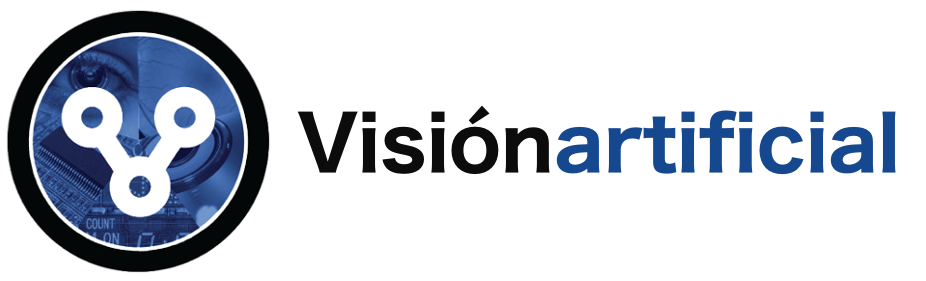

#  Espazos de cor con OpenCV

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

## Benvido ao segundo notebook do tema 2!

Neste módulo cubriremos os conceptos máis fundamentais asociados ás imaxes en cor. Inclúen espazos de cor, canles de cor e algunhas consideracións prácticas asociadas á lectura e visualización de imaxes en cor.

* Lectura e visualización de imaxes en cor [recordatorio]
* División e fusión de canles de cor [recordatorio]
* Conversión a diferentes espazos de cor
* Gardar imaxes [recordatorio] 

## Fundamentos sobre os espazos de cor

En termos sinxelos, un espazo de cor é unha organización específica de cores que normalmente representa o espazo de todas as cores posibles percibibles polo sistema visual humano. Un modelo de cor é unha construción matemática para especificar as cores no espazo cunha tupla única de números (normalmente como tres ou catro valores que representan as aportacións relativas das compoñentes da cor). Un modelo de cor pódese pensar como un xeito matemático de navegar por un espazo de cor. Non obstante, é moi común empregar o termo "espazo de cor" para definir colectivamente un modelo de cor xunto cun mapeo específico dese modelo nun espazo de cor absoluto.

Como introdución aos espazos de cor consideraremos os modelos de uso común: o espazo de cor RGB (para vermello, verde, azul), o espazo de cor HSV (para matiz, saturación, valor) e o CIE-Lab (luminancia e dúas oponencias de cores). Estes espazos usan un sistema de coordenadas tridimensional para especificar as cores compoñentes que representan unha tupla e, polo tanto, unha cor única. As compoñentes tamén se denominan canles de cor. Dado que este tipo de imaxes se acostuman a representarse por tres canles de cor con números enteiros, sen signo, de 8 bits para cada canle, os compoñentes de cor individuais poden tomar valores de [0,255]. Polo tanto, podemos representar 16,77 millóns de cores únicas en calquera espazo de cor (256 * 256 * 256). 


### Función de OpenCV para manexo de espazos de cor ( cv2.cvtColor )

cv2.cvtColor() é a función empregada para traballar con espazos de cor e imaxes de gris.
** `cvtColor ()` ** Converte unha imaxe dun espazo de cor a outro. Ten en conta que o formato de cor predeterminado en OpenCV, que adoita dchamarse RGB, en realidade é BGR (os bytes invértense). Así, o primeiro byte dunha imaxe en cor estándar (24 bits) será un compoñente azul de 8 bits, o segundo byte será verde e o terceiro byte será vermello. Esta función pódese usar para cambiar simplemente a orde das canles azul e vermella polo espazo de cor RGB, pero tamén se pode usar para converter entre espazos de cor como veremos máis adiante. 

#### Sintaxe:

cv2.cvtColor(src, code, dst, dstCn)

Parámeteros:

src: Imaxe cuxo espazo de cor desexamos cambiar.

code: este é o código que identifica a conversión que se vai levar a cabo:

- cv2.COLOR_BGR2GRAY: código para converter imaxe BGR a escala de grises.

- cv2.COLOR_BGR2HSV : código para converter imaxe BGR ao espazo de cor HSV.

- cv2.COLOR_BGR2RGB : código para converter imaxe  BGR ao espazo de cor RGB.

- cv2. cv2.COLOR_BGR2LAB: código para converter imaxe  BGR ao espazo de cor LAB.

1. dst: é a imaxe de saida do mesmo tamña e canles que a imaxe src. É un parámetro opcional.

2. dstCn: Indica o número de canles na imaxe de saída. Se o parámetro é 0 entón o número de canles derivarase automaticamente dende src e code. Parámetro opcional

### <font color="green">ocumentación de OpenCV</font>

[**`cvtColor()`**](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
[**`ColorConversionCodes()`** ](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />




### Importamos Paquetes

In [1]:

import matplotlib.pyplot as plt
import cv2

### Función para visualizar imaxes en Jupyter Notebook e Google Colab

In [2]:
def plt_imshow(title, image):
    # convertemos a imaxe dende BGR ao espazo de cor RGB e a visualizamos
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap="gray")
    #plt.imshow(image, cmap="jet")
    plt.title(title)
    plt.grid(False)
    plt.show()

In [3]:

# empregamos un diccionario para pasarlle ao programa a imaxe a cargar
args = {
    "image": "../data/images/beach.png",
}

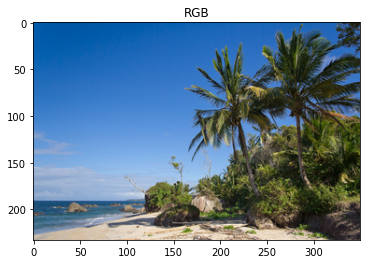

In [4]:
# cargamos a imaxe orixinal e a visualizamos
image = cv2.imread(args["image"])
plt_imshow("RGB", image)

O espazo de cores RGB (ou invertido BGR) ten as seguintes propiedades

- É un espazo de cores aditivo onde as cores se obteñen mediante unha combinación lineal de valores vermello, verde e azul.
- As tres canles están correlacionadas coa cantidade de luz que bate na superficie.

Imos a dividir unha imaxes nas súas compoñentes R, G e B e observa para obter máis información sobre o espazo de cores. 

Os problemas inherentes asociados este espazo son:

- non uniformidade perceptiva significativa (se cambiamos a iluminación mantendo mesmo obxecto).
- mestura de datos de crominancia (información relacionada coa cor) e luminancia (información relacionada coa intensidade). 

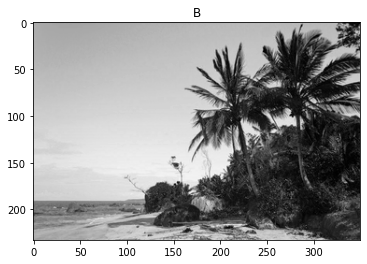

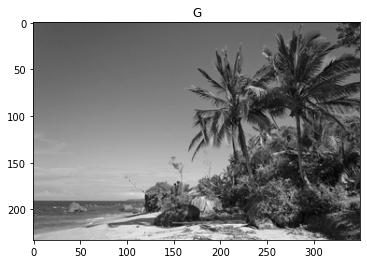

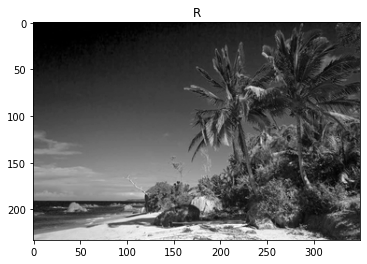

In [5]:
# Lazo sobre todas as canles e as visualizamos
for (name, chan) in zip(("B", "G", "R"), cv2.split(image)):
    plt_imshow(name, chan)

O espazo de cores HSV ten as seguintes tres compoñentes:

-H: Matiz (lonxitude de onda dominante).
-S: Saturación (pureza / tons da cor).
-V: Valor (intensidade).

Enumeremos algunhas das súas propiedades:

- Só usa unha canle para describir a cor (H), polo que é moi intuitivo.
- Depende do dispositivo.

A continuación móstranse os compoñentes H, S e V da imaxe. 

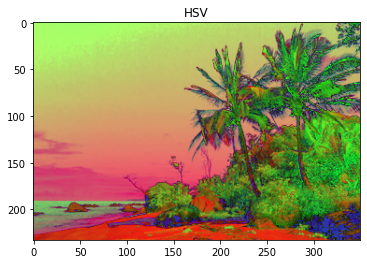

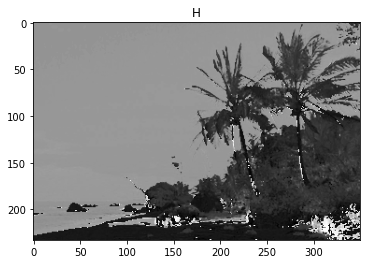

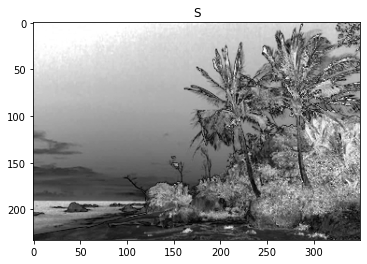

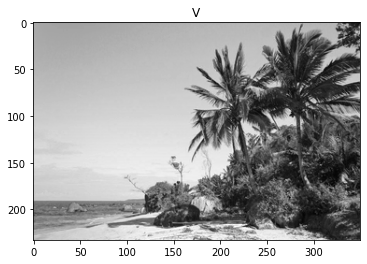

Text(0.5, 1.0, 'Modificada')

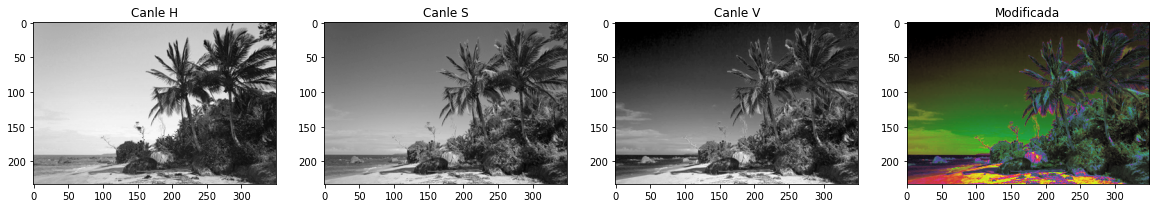

In [13]:
# Convertemos a imaxe ao espazo de cor HSV e a visualizamos
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt_imshow("HSV", hsv)

# Lazo sobre todas as canles e as visualizamos
for (name, chan) in zip(("H", "S", "V"), cv2.split(hsv)):
	plt_imshow(name, chan)
    
    
    
    
# Voltamos a divider a imaxe nas compoñentes B,G,R.
h, s, v = cv2.split(image)

#modificamos as canles e visualizamos    
h_new = h + 10
img_hsv_merged = cv2.merge((h_new, s, v))
img_rgb_merged = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2RGB)

# Visualizamos as canles.
plt.figure(figsize = [20,5])
plt.subplot(141); plt.imshow(h_new, cmap="gray"); plt.title('Canle H')
plt.subplot(142); plt.imshow(s, cmap="gray"); plt.title('Canle S')
plt.subplot(143); plt.imshow(v, cmap="gray"); plt.title('Canle V' )

# Visualizamos a imaxe modificada.
plt.subplot(144); plt.imshow(img_rgb_merged); plt.title('Modificada')

In [ ]:
O espazo de cor Lab ten tres compoñentes.

- L : Luminosidade (intensidade).
- a : compoñente de cor que vai dende verde ao vermello.
- b : compoñente de cor que vai dende azul ao amarelo.

O espazo de cor Lab é bastante diferente do espazo de cor RGB dado que neste espazo a información de cor
sepárase en tres canles que codifican a información de cor e luminancia (gris). Por outra banda, 
no espazo de cor Lab, a canle L é independente da información de cor e só codifica o brillo. 
As outras dúas canles codifican a cor.

Ten as seguintes propiedades:

- Espazo de cor perceptivamente uniforme que se aproxima a como percibimos a cor.
- Independente do dispositivo (captura ou visualización).
- Usado extensamente en Adobe Photoshop.
- Está relacionado co espazo de cor RGB por unha ecuación de transformación complexa.

Vexamos a imaxe no espazo de cor Lab separadas as tres canles. 

In [ ]:
# Convertemos a imaxe ao espazo de cor L*a*b* e a visualizamos
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt_imshow("L*a*b*", lab)

# Lazo sobre todas as canles e as visualizamos
for (name, chan) in zip(("L*", "a*", "b*"), cv2.split(lab)):
	plt_imshow(name, chan)

Escala de grises

O último espazo de cores que imos discutir non é realmente un espazo de cor: é simplemente a representación en escala de grises dunha imaxe RGB.

Unha representación en escala de grises dunha imaxe desbota a información de cor da imaxe (suma ponderada das bandas de cor) e tamén se pode facer usando a función cv2.cvtColor. 

In [ ]:
# visualizamos a imaxe orixinal e a súa versión de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Orixinal", image)
plt_imshow("Escala de gris", gray)

# Exercicios

In [ ]:
# Exercicio 1 (clase): Converte unha imaxe RGB ao espazo de cor YCrCb

NOTAS:
O espazo de cor YCrCb deriva do espazo de cor RGB e ten as seguintes tres compoñentes:

- Y : Luminancia ou compoñente Luma obtido a partir de RGB despois da corrección gamma.
- Cr = R - Y (a que distancia está o compoñente vermello de Luma).
- Cb = B - Y (a que distancia está o compoñente azul de Luma).

Este espazo de cor ten as seguintes propiedades:

- Separa as compoñentes de luminancia e crominancia en diferentes canles.
- Úsase principalmente na compresión (de compoñentes Cr e Cb) para transmisión de TV.
- Depende do dispositivo. 

##METE O CÓDIGO AQUI


In [ ]:
# Exercicio 2:
Completa o código aqui:


# Le e salva a imaxe ('Lago.jpg') como unha imaxe de cor.
# CÓDIGO AQUI

# Visualiza o tamaño da imaxe.
# CÓDIGO AQUI

# Converte a imaxe a gris empregando cv2.cvtColor().
# CÓDIGO AQUI

# Visualiza o tamaño da imaxe.
# CÓDIGO AQUI

# Visualiza a imaxe emrepgando matplotlib imshow()
# plt.figure(figsize = [10, 10])
# CÓDIGO AQUI